# Part 1: Perceptron

## 1) Data set

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

In [2]:
data = load_breast_cancer()

In [3]:
print("positive class:", sum(data.target == 1))
print("negative class:", sum(data.target == 0))

positive class: 357
negative class: 212


```imbalanced classes```

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.25, random_state=22)

In [5]:
sm = SMOTE(random_state=22, sampling_strategy='minority')
X_tr_sm, y_tr_sm = sm.fit_sample(X_train, y_train)

In [6]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_sm = LogisticRegression(solver='liblinear').fit(X_tr_sm, y_tr_sm)

y_pred = lr.predict(X_test)
y_pr_sm = lr_sm.predict(X_test)

score = precision_recall_fscore_support(y_test, y_pred)
score_sm = precision_recall_fscore_support(y_test, y_pr_sm)

print("performance of Logistic Regression without oversampling", score)
print("performance of Logistic Regression with oversampling", score_sm)

performance of Logistic Regression without oversampling (array([0.97959184, 0.92553191]), array([0.87272727, 0.98863636]), array([0.92307692, 0.95604396]), array([55, 88]))
performance of Logistic Regression with oversampling (array([0.98      , 0.93548387]), array([0.89090909, 0.98863636]), array([0.93333333, 0.96132597]), array([55, 88]))


In [7]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=None).fit(
    X_train, y_train)
rf_sm = RandomForestClassifier(n_estimators=100, n_jobs=None).fit(
    X_tr_sm, y_tr_sm)

y_pred = rf.predict(X_test)
y_pr_sm = rf_sm.predict(X_test)

score = precision_recall_fscore_support(y_test, y_pred)
score_sm = precision_recall_fscore_support(y_test, y_pr_sm)

print("performance of Random Forest without oversampling", score)
print("performance of Random Forest with oversampling", score_sm)

performance of Random Forest without oversampling (array([0.96078431, 0.93478261]), array([0.89090909, 0.97727273]), array([0.9245283 , 0.95555556]), array([55, 88]))
performance of Random Forest with oversampling (array([0.98      , 0.93548387]), array([0.89090909, 0.98863636]), array([0.93333333, 0.96132597]), array([55, 88]))


```conclusion: using SMOTE for oversampling will result in a minor improvement```

In [8]:
data.data = MinMaxScaler().fit_transform(data.data)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.25, random_state=22)

In [10]:
sm = SMOTE(random_state=22, sampling_strategy='minority')
X_train, y_train = sm.fit_sample(X_train, y_train)

## 2) Building Model

In [11]:
# you can find implementation of perceptron in perceptron.py
import perceptron as pn

## 3) Run and Evaluate

In [12]:
perc = pn.Perceptron()
perc = perc.fit(X_train, y_train)
print(perc.errors[-1])

0.011152416356877323


In [13]:
y_pred = perc.predict(X_test)
score = precision_recall_fscore_support(y_test, y_pred)
print("precision: ", score[0])
print("recall: ", score[1])
print("fscore: ", score[2])
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

precision:  [1.         0.93617021]
recall:  [0.89090909 1.        ]
fscore:  [0.94230769 0.96703297]
accuracy:  0.958041958041958


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

## 4) Further optimization

### Using different train-test split factor

Text(0, 0.5, 'accuracy')

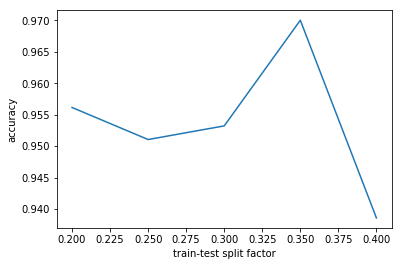

In [15]:
factors = [0.20, 0.25, 0.30, 0.35, 0.40]
accs = []
for f in factors:
    X_train_, X_test_, y_train_, y_test_ = train_test_split(
        data.data, data.target, test_size=f, random_state=22)
    X_train_, y_train_ = sm.fit_sample(X_train_, y_train_)
    perc = pn.Perceptron()
    perc = perc.fit(X_train_, y_train_)
    y_pred_ = perc.predict(X_test_)
    acc = accuracy_score(y_test_, y_pred_)
    accs.append(acc)

plt.plot(factors, accs)
plt.xlabel("train-test split factor")
plt.ylabel("accuracy")



```accuracy changes 5 percent at most```

### Using larger epochs size

[0.958041958041958, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.958041958041958]


Text(0, 0.5, 'accuracy')

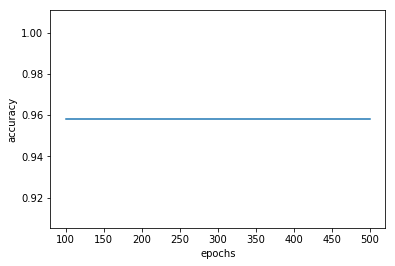

In [18]:
epoch_sizes = [100, 200, 300, 400, 500]
accs = []

for e in epoch_sizes:
    perc = pn.Perceptron(epochs=e)
    perc = perc.fit(X_train, y_train)
    y_pred_ = perc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)

plt.plot(epoch_sizes, accs)
plt.xlabel("epochs")
plt.ylabel("accuracy")


### Using different learning rates

Text(0, 0.5, 'accuracy')

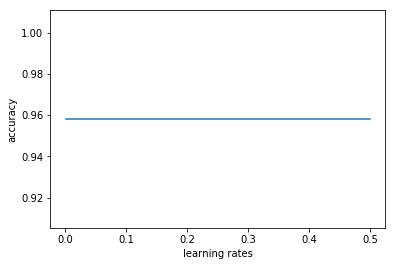

In [17]:
learning_rates = [0.001, 0.01, 0.1, 0.5]
accs = []

for lr in learning_rates:
    perc = pn.Perceptron(lr=lr)
    perc = perc.fit(X_train, y_train)
    y_pred_ = perc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)

plt.plot(learning_rates, accs)
plt.xlabel("learning rates")
plt.ylabel("accuracy")
